# EDA

1. Distribution of each feature
2. Some sort of correlogram of your own features, and your features vs the label
3. Any missing values, values seem strange
4. How can we obtain each of your feature if we’re given a never-seen url (for example, python script that can count the number of “!” in the url)
5. Reasons we might need to manipulate/drop certain features for model building (binning, truncating, logging, etc; write them down in your notebook)

In [54]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

<ipython-input-54-12679ea485e9>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
with open("config/EDA_config.yaml", "r") as f:
	config = yaml.safe_load(f)
	
config_eda = config['EDA']

In [3]:
df = pd.read_csv(config_eda['dataset']['path'])

In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
subset_df = df.iloc[:,23:45]
response = df.iloc[:,-1]

In [6]:
subset_df.head()

,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path
0,0,0,1,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,4,4,3,3,3
1,0,0,1,0.220779,0.0,0,0,0,0,0,...,0,0,0,1,0,4,4,2,19,2
2,0,0,0,0.150794,0.0,0,0,0,1,0,...,0,0,0,1,0,12,2,2,3,2
3,0,0,1,0.000000,0.0,0,0,0,0,0,...,0,0,0,1,0,1,0,5,5,0
4,0,0,1,0.000000,0.0,0,0,0,0,0,...,0,0,0,1,0,6,3,3,3,4


In [7]:
subset_df.info() # mostly int with 2 float columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nb_dslash                11430 non-null  int64  
 1   http_in_path             11430 non-null  int64  
 2   https_token              11430 non-null  int64  
 3   ratio_digits_url         11430 non-null  float64
 4   ratio_digits_host        11430 non-null  float64
 5   punycode                 11430 non-null  int64  
 6   port                     11430 non-null  int64  
 7   tld_in_path              11430 non-null  int64  
 8   tld_in_subdomain         11430 non-null  int64  
 9   abnormal_subdomain       11430 non-null  int64  
 10  nb_subdomains            11430 non-null  int64  
 11  prefix_suffix            11430 non-null  int64  
 12  random_domain            11430 non-null  int64  
 13  shortening_service       11430 non-null  int64  
 14  path_extension        

In [8]:
subset_df.isnull().sum() # no null values # yay

nb_dslash                  0
http_in_path               0
https_token                0
ratio_digits_url           0
ratio_digits_host          0
punycode                   0
port                       0
tld_in_path                0
tld_in_subdomain           0
abnormal_subdomain         0
nb_subdomains              0
prefix_suffix              0
random_domain              0
shortening_service         0
path_extension             0
nb_redirection             0
nb_external_redirection    0
length_words_raw           0
char_repeat                0
shortest_words_raw         0
shortest_word_host         0
shortest_word_path         0
dtype: int64

In [9]:
subset_df.describe()

,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,...,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950
std,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,...,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,3.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.000000,3.000000,2.000000
75%,0.000000,0.000000,1.000000,0.079365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,4.000000,3.000000,6.000000,3.000000
max,1.000000,4.000000,1.000000,0.723881,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.000000,1.000000,106.000000,146.000000,31.000000,39.000000,40.000000


### Correlation plot

In [10]:
_, response_int = np.unique(response, return_inverse=True) # get int values of response

In [11]:
response

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [12]:
response_int #legitimate = 0, phishing = 1

array([0, 1, 1, ..., 0, 0, 1])

In [13]:
subset_df['response'] = response_int

<Axes: >

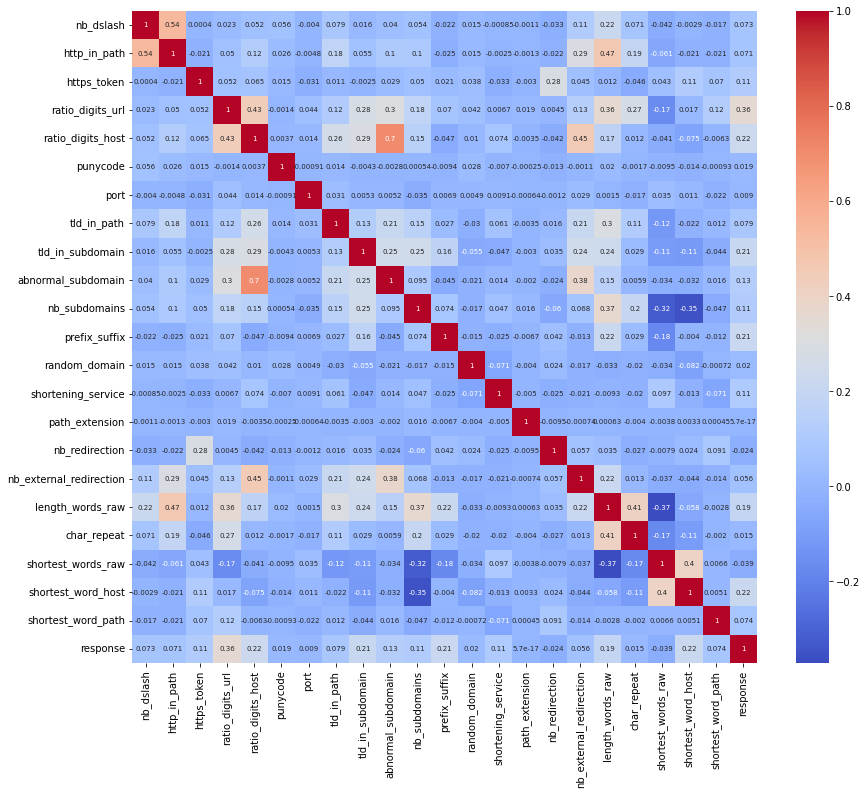

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(subset_df.corr(), annot=True,annot_kws={"size": 7}, cmap='coolwarm') # not much correlation

<Axes: xlabel='status', ylabel='count'>

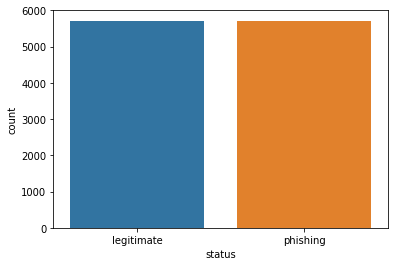

In [16]:
sns.countplot(subset_df, x=response)

In [15]:
subset_df.nunique()

nb_dslash                     2
http_in_path                  5
https_token                   2
ratio_digits_url           1414
ratio_digits_host           241
punycode                      2
port                          2
tld_in_path                   2
tld_in_subdomain              2
abnormal_subdomain            2
nb_subdomains                 3
prefix_suffix                 2
random_domain                 2
shortening_service            2
path_extension                2
nb_redirection                7
nb_external_redirection       2
length_words_raw             54
char_repeat                  55
shortest_words_raw           25
shortest_word_host           34
shortest_word_path           33
response                      2
dtype: int64

In [18]:
high_col = subset_df.loc[:, subset_df.nunique() > 10].columns # columns with nunqiue values > 10
low_col = subset_df.columns.difference(high_col) # columns with nunqiue values <= 10

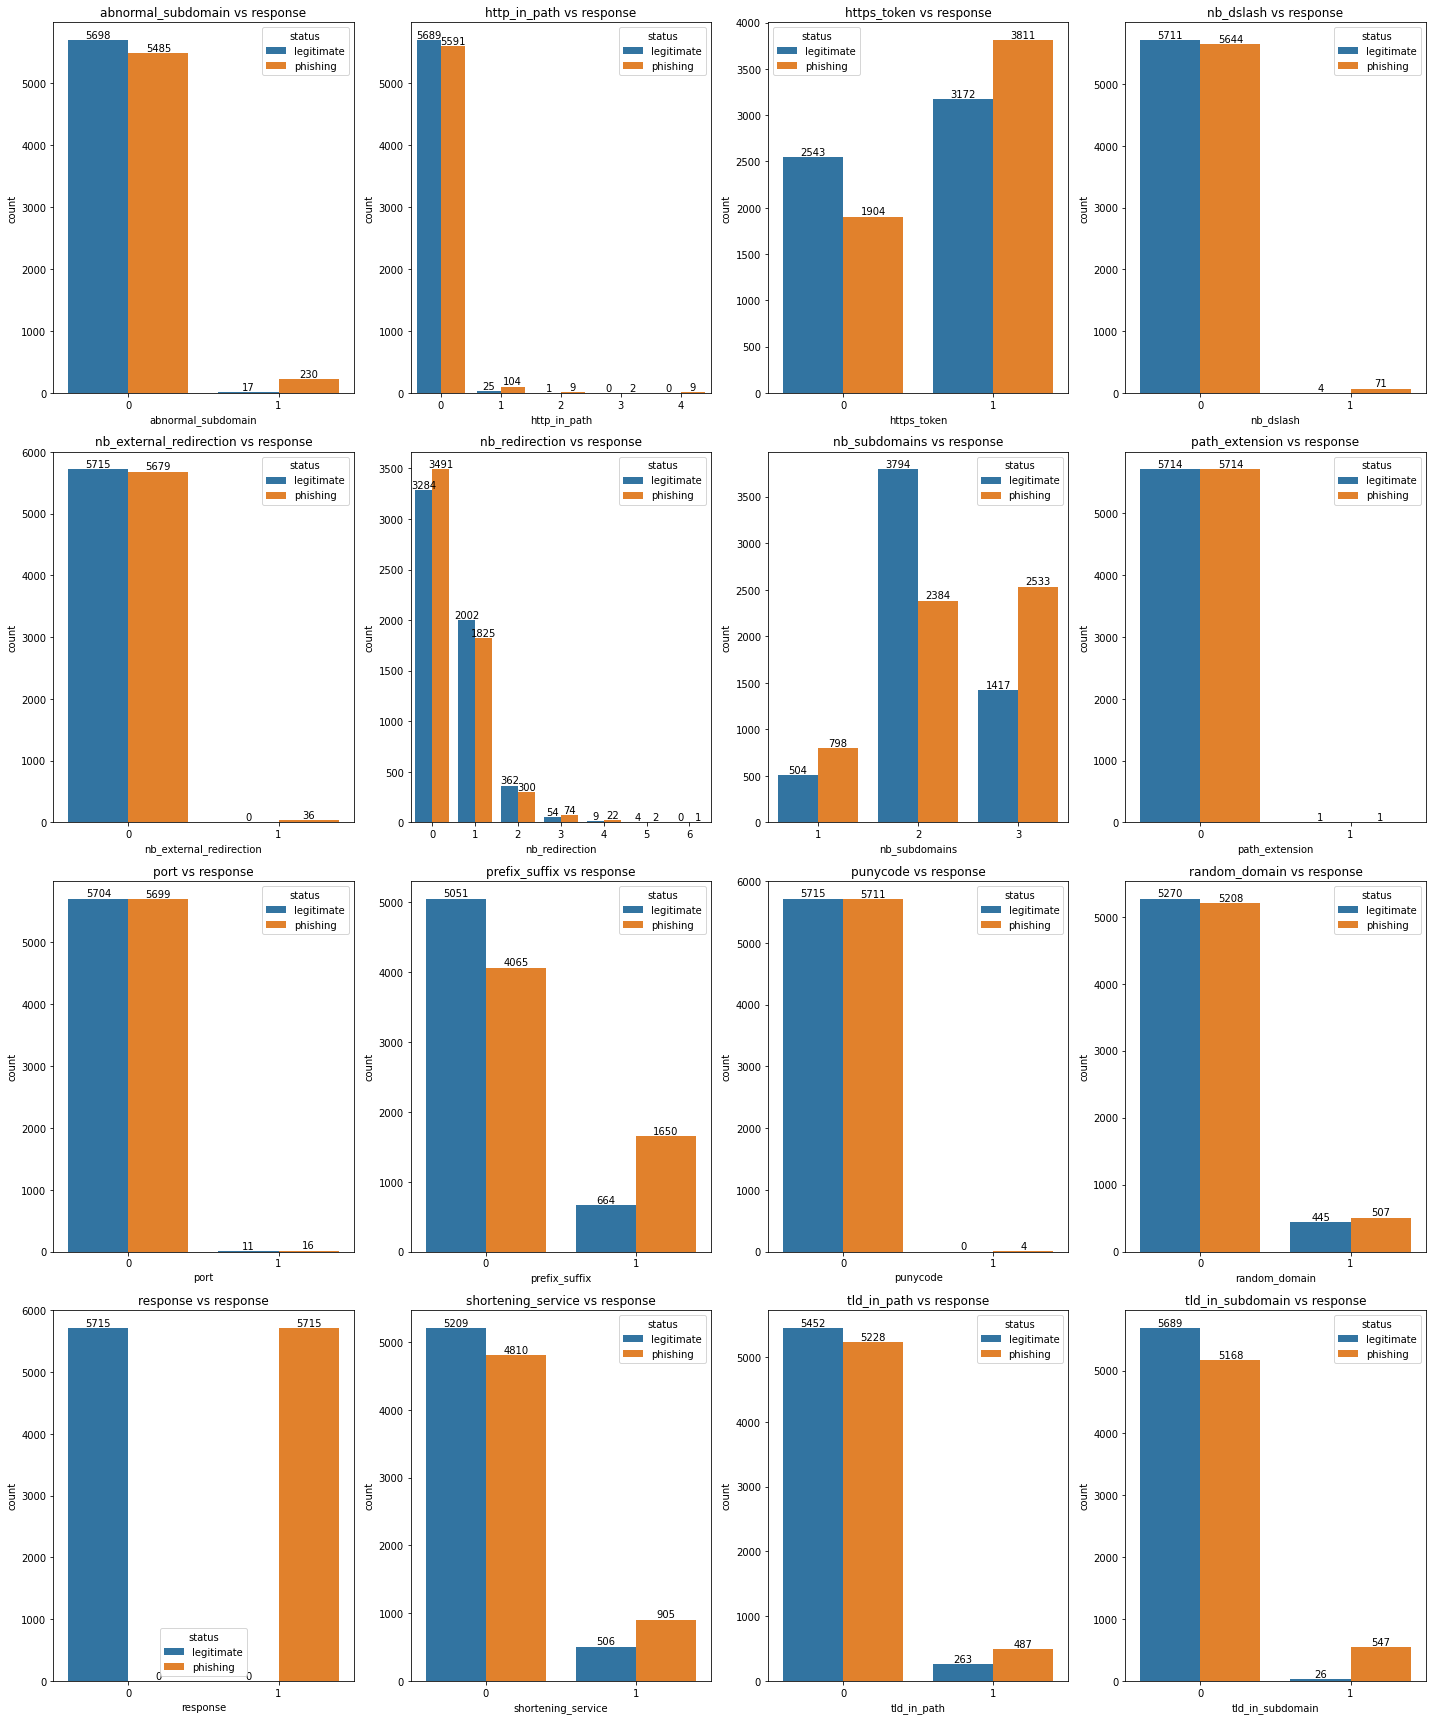

In [35]:
fig, axes = plt.subplots(math.ceil(len(low_col)/4), 4, figsize=(20,1.5*len(low_col)))

for i in range(len(low_col)):
        q, mod = divmod(i,4)
        axes[q,mod].set_title(f"{low_col[i]} vs response")
        sns.countplot(subset_df, x= low_col[i],hue=response, ax=axes[q,mod])
        axes[q,mod].bar_label(axes[q,mod].containers[0], label_type='edge')
        axes[q,mod].bar_label(axes[q,mod].containers[1], label_type='edge')
plt.tight_layout()
# https_token, prefix_suffix

### Potential Variables to drop

In [57]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-57-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [62]:
# path_extension, port

In [39]:
subset_df.columns

Index(['nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'response'],
      dtype='object')

In [42]:
subset_df['path_extension'].value_counts()

0    11428
1        2
Name: path_extension, dtype: int64

In [56]:
df[subset_df['path_extension'] == 1][['url','status']]

,url,status
292,http://www.networksorcery.com/enp/rfc/rfc2812.txt,legitimate
7236,https://kwansasia.com/.%20/styles-link-done/d5628b6c37513bc0c2e0d0fd349b954e.txt,phishing


In [52]:
subset_df['port'].value_counts()

0    11403
1       27
Name: port, dtype: int64

In [59]:
df[subset_df['port'] == 1][['url','status']].sort_values('status')

,url,status
10320,https://cryptopanic.com:443/,legitimate
8635,https://sdelairukami.ru:443/,legitimate
3746,https://lingust.ru:443/,legitimate
3716,http://www.wolterskluwer.it:80/,legitimate
3599,https://gidfermer.com:443/,legitimate
2293,https://poravkino.ru:443/,legitimate
1184,https://printexx.ru:443/,legitimate
880,http://www.360.ru:80/,legitimate
857,https://portaal.webreus.nl:8080,legitimate
525,https://life4news.ru:443/,legitimate


In [60]:
subset_df['punycode'].value_counts()

0    11426
1    4    
Name: punycode, dtype: int64

In [61]:
df[subset_df['punycode'] == 1][['url','status']].sort_values('status') # don't drop

,url,status
4618,http://xn--ltappen-80a.se/_default.asp,phishing
5750,http://xn--begrnungswiki-zob.de/includes/amazon/ap/signin/da2fc8c05d775f6427f3d81ad45ff21d/login.php?/ap/signin_encoding=UTF8-URL=https://www.amazon.com,phishing
6398,http://xn--wellness-rhn-fjb.de/wp-content/logo/Whatsapp/,phishing
10133,http://xn--b1amvejg.com/wp-content/plugins/.akismet/mail.htm?cmd=LOB=RBGLogon&amp;_pageLabel=page_logonform&amp;secured_page,phishing
